# 다중 레이블 분류 (multilabel classification)
- 각 샘플마다 여러 개의 클래스를 출력해야 하는 경우<br>
    ex) classifier가 사진에서 A,B,C를 분류해내는데 A,C가 동시에 있다면 [1,0,1]을 출력

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


(70000, 784)   (70000,)


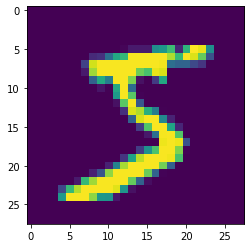

In [3]:
X,y = mnist['data'], mnist['target']
print(X.shape,' ', y.shape)
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)

In [4]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

y_train_large = (y_train>=7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]
print(y_multilabel.shape)

knn.fit(X_train, y_multilabel)

(60000, 2)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
knn.predict([some_digit])

array([[False,  True]])

In [7]:
knn.predict_proba([some_digit])

[array([[1., 0.]]), array([[0., 1.]])]

## 평가

In [8]:
y_test_large = (y_test>=7)
y_test_odd = (y_test%2 == 1)
y_test_multilabel = np.c_[y_test_large,y_test_odd]

In [9]:
y_test_pred = knn.predict(X_test)

In [10]:
from sklearn.metrics import f1_score, accuracy_score
# 두 예측의 score에 대해 평균을 내고자할 때는 macro
# 샘플 개수에 따른 가중평균을 내고자 할때는 weighted, 그외 기타 등등
f1_score(y_test_multilabel, y_test_pred, average = 'macro')

0.9778834608379015

In [12]:
y_train[0]

5

# 다중 출력 다중 클래스 분류 (multioutput-multiclass classification)
(다중 출력 분류, multioutput classification)

이미지에서 잡음을 제거하는 시스템을 만들어보도록 한다.<br>
잡음이 많은 숫자 이미지 $\rightarrow$ 깨끗한 숫자이미지(pixel의 강도)<br>
각 레이블은 0~255개의 값을 갖는다.

In [13]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise

# multi label
y_train_mod = X_train
y_test_mod = X_test

In [14]:
knn.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
some_index = np.random.randint(len(X_test))
clean_digit = knn.predict([X_test_mod[some_index]])

Text(0.5, 1.0, 'clean')

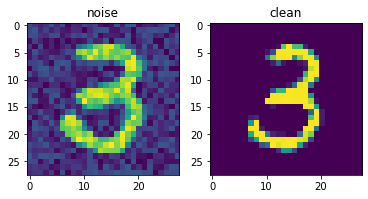

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(X_test_mod[some_index].reshape(28,28))
ax[0].set_title('noise')
ax[1].imshow(clean_digit.reshape(28,28))
ax[1].set_title('clean')